<a href="https://colab.research.google.com/github/pihchikk/machine-learning-to-predict-the-oxidizaility-of-organic-carbon-in-surface-soil/blob/main/notebooks/EDA/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Dependencies and imports

In [ ]:
!pip install phik

In [ ]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
from phik import phik_matrix
from google.colab import drive
import matplotlib.pyplot as plt

## Mount drive, upload data

In [ ]:
drive.mount('/content/drive')
df = pd.read_excel('/content/drive/MyDrive/Tokarevka_data/Fieldpoints_tokarevka.xlsx')
biotopes = df.Biotopes_s
df = df.drop('Biotopes_s', axis=1)
df = df.drop('rand_point', axis=1)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Remove phenology variables

In [ ]:
years_to_drop = ['2019', '2020', '2021', '2022', '2023']
df_nophen = df.drop(columns=[col for col in df.columns if any(year in col for year in years_to_drop)])

## Separate X and Y

In [ ]:
x = df.drop(['hard', 'med', 'easy', 'hard_sh', 'med_sh', 'easy_sh', 'sum'], axis=1) #features including phenological covariates
df_nophen_x = df_nophen.drop(['hard', 'med', 'easy', 'hard_sh', 'med_sh', 'easy_sh', 'sum'], axis=1) #features not including phenological covariates

In [ ]:
target = df[['hard', 'med', 'easy', 'sum', 'hard_sh', 'med_sh', 'easy_sh']]

## Histograms


In [ ]:
#plt.rcParams['font.family'] = 'Arial'

def plot_histograms(df):
    num_cols = len(df.columns)
    num_rows = (num_cols + 3) // 4

    fig, axes = plt.subplots(num_rows, 4, figsize=(20, 5 * num_rows))
    axes = axes.flatten()

    for i, col in enumerate(df.columns):
        sns.histplot(df[col], ax=axes[i], kde=True)
        axes[i].set_title(f'Гистограмма значений признака {col}', fontsize=14)
        axes[i].set_xlabel(col, fontsize=12)
        axes[i].set_ylabel('Frequency', fontsize=12)

    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

#plot_histograms(target)

## No targets, pearson correlation heatmap

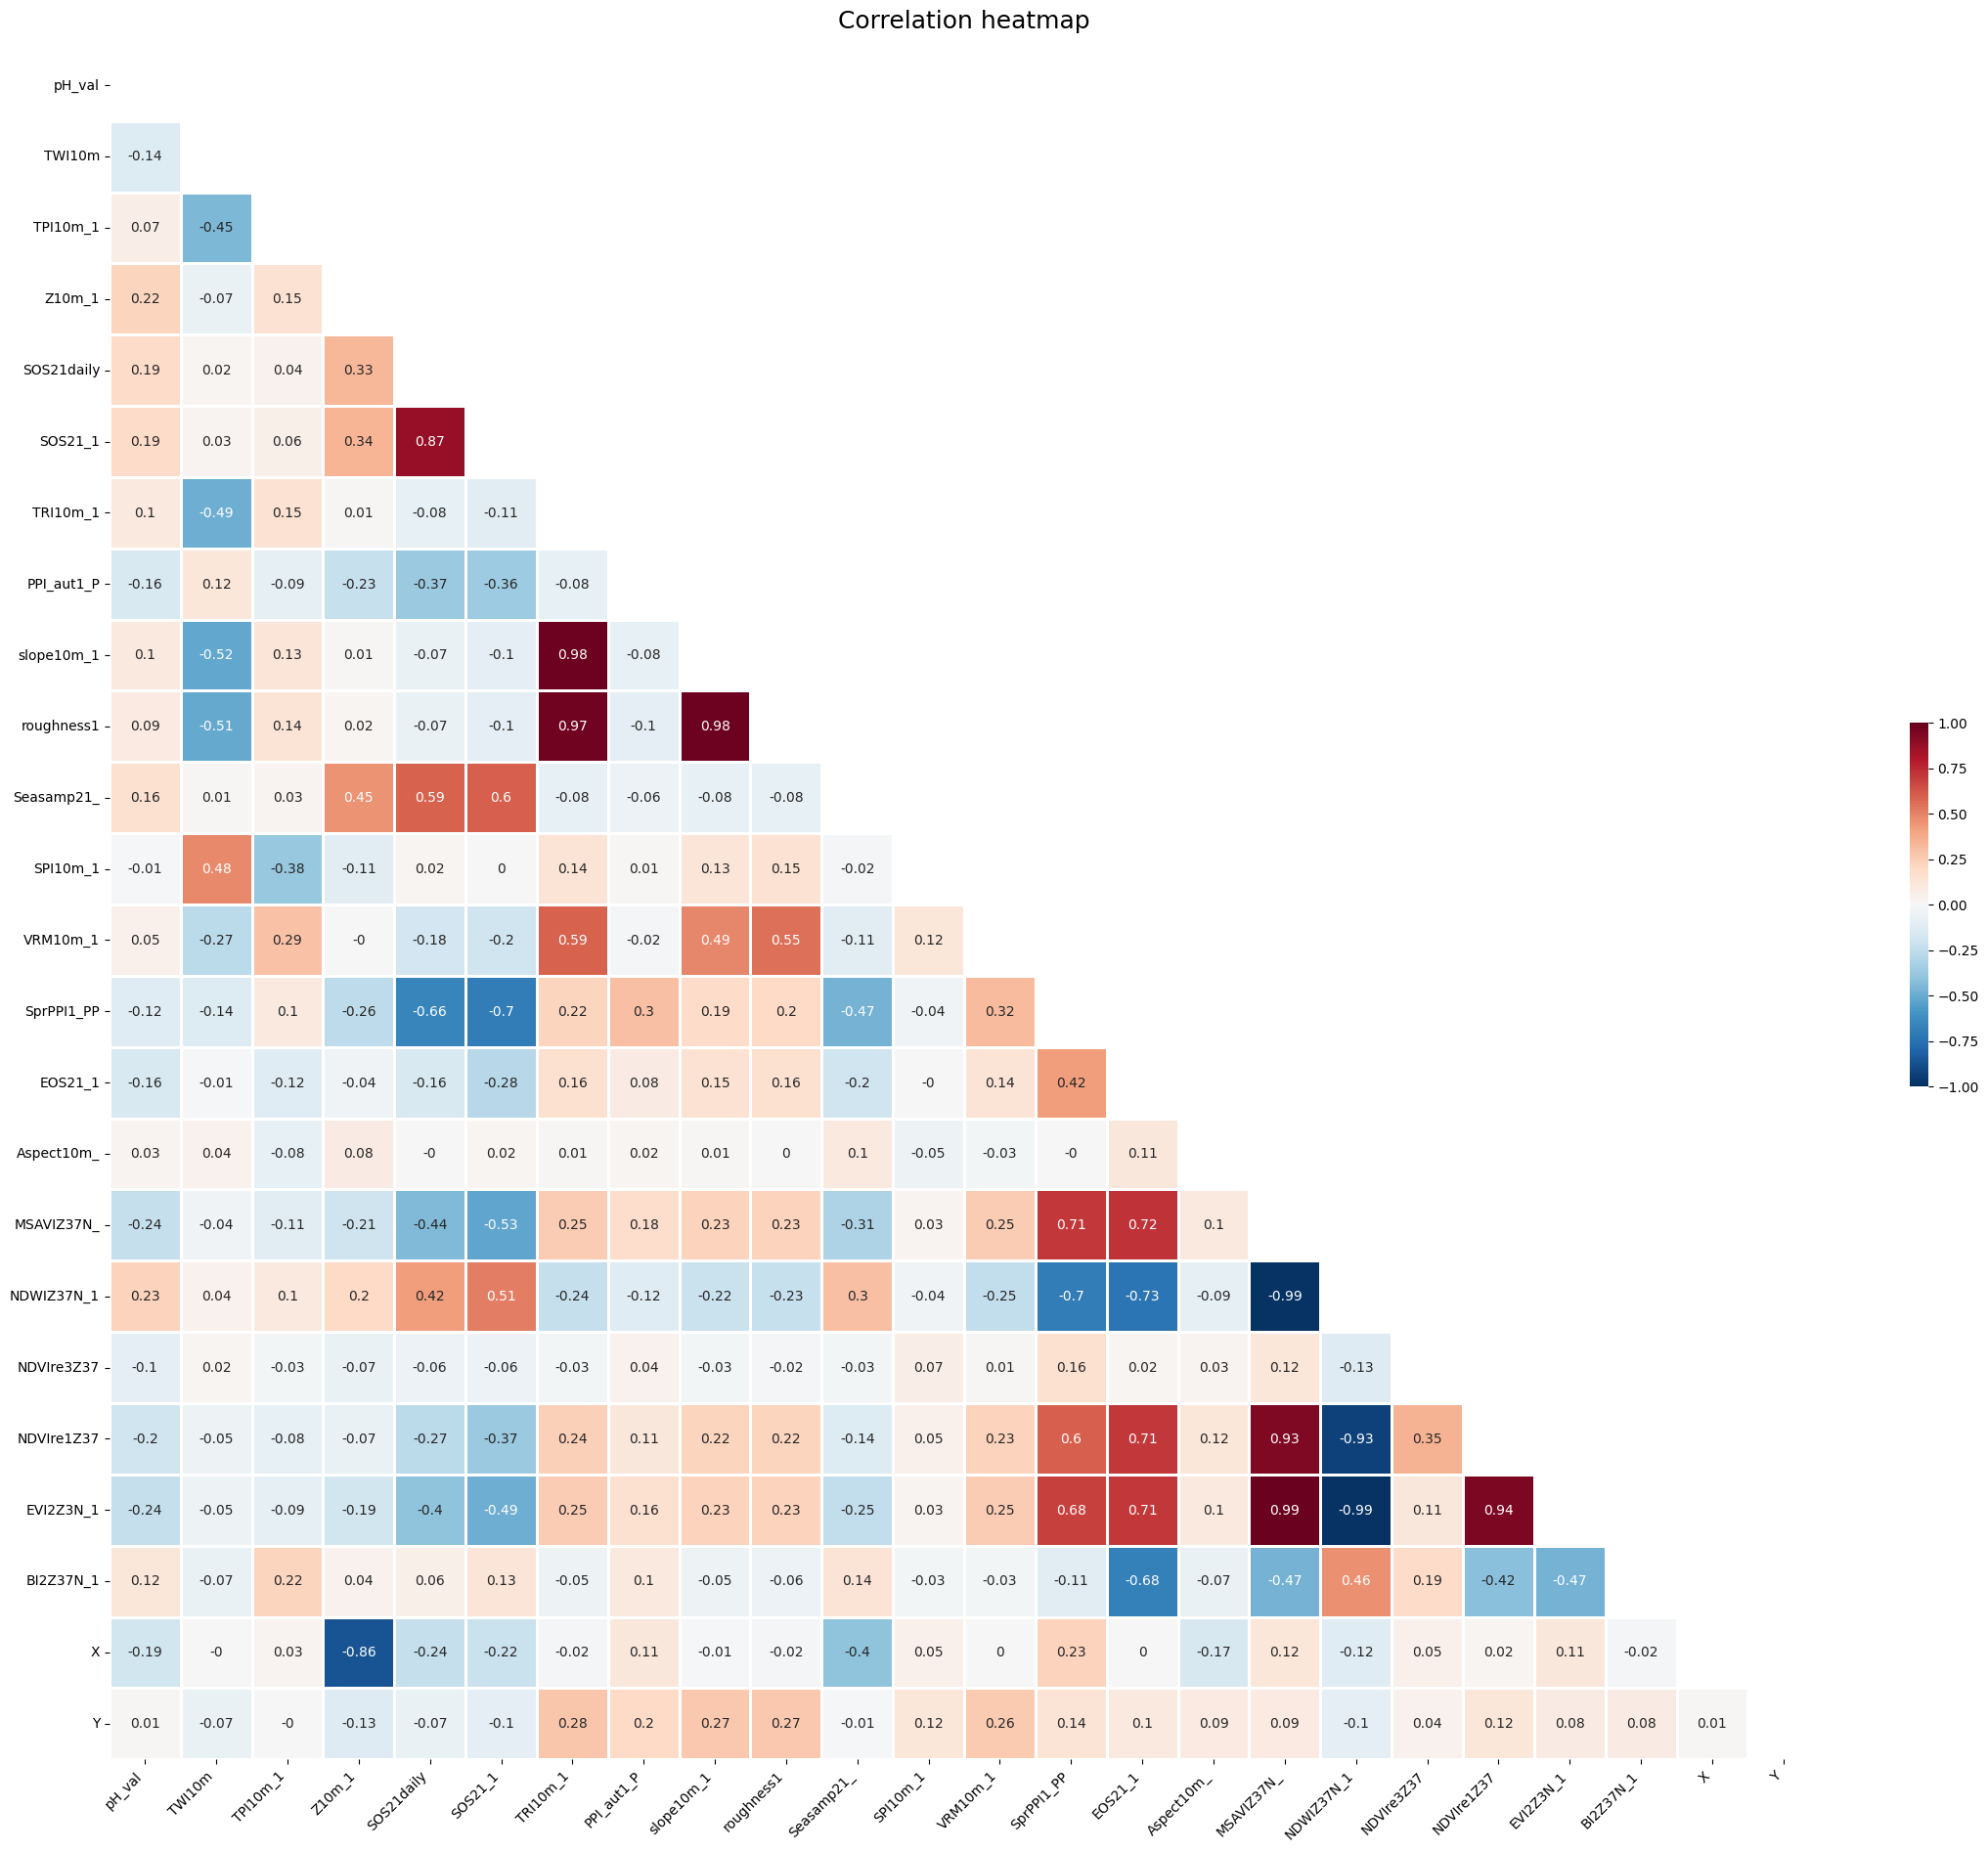

In [ ]:
correlation_matrix = df_nophen_x.corr(method="pearson", numeric_only=True).round(2)

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

plt.figure(figsize=(24, 24))

heatmap = sns.heatmap(
    correlation_matrix,
    mask=mask,  # Apply the mask
    annot=True,
    square=True,
    cmap="RdBu_r",
    vmax=1,
    vmin=-1,
    cbar_kws={"fraction": 0.01},  # shrink colour bar
    linewidth=2,
)

heatmap.set_xticklabels(
    heatmap.get_xticklabels(), rotation=45, horizontalalignment="right"
)

heatmap.set_title("Корреляционная матрица признаков", fontdict={"fontsize": 18}, pad=16)
plt.show()

## targets, pearson correlation heatmap

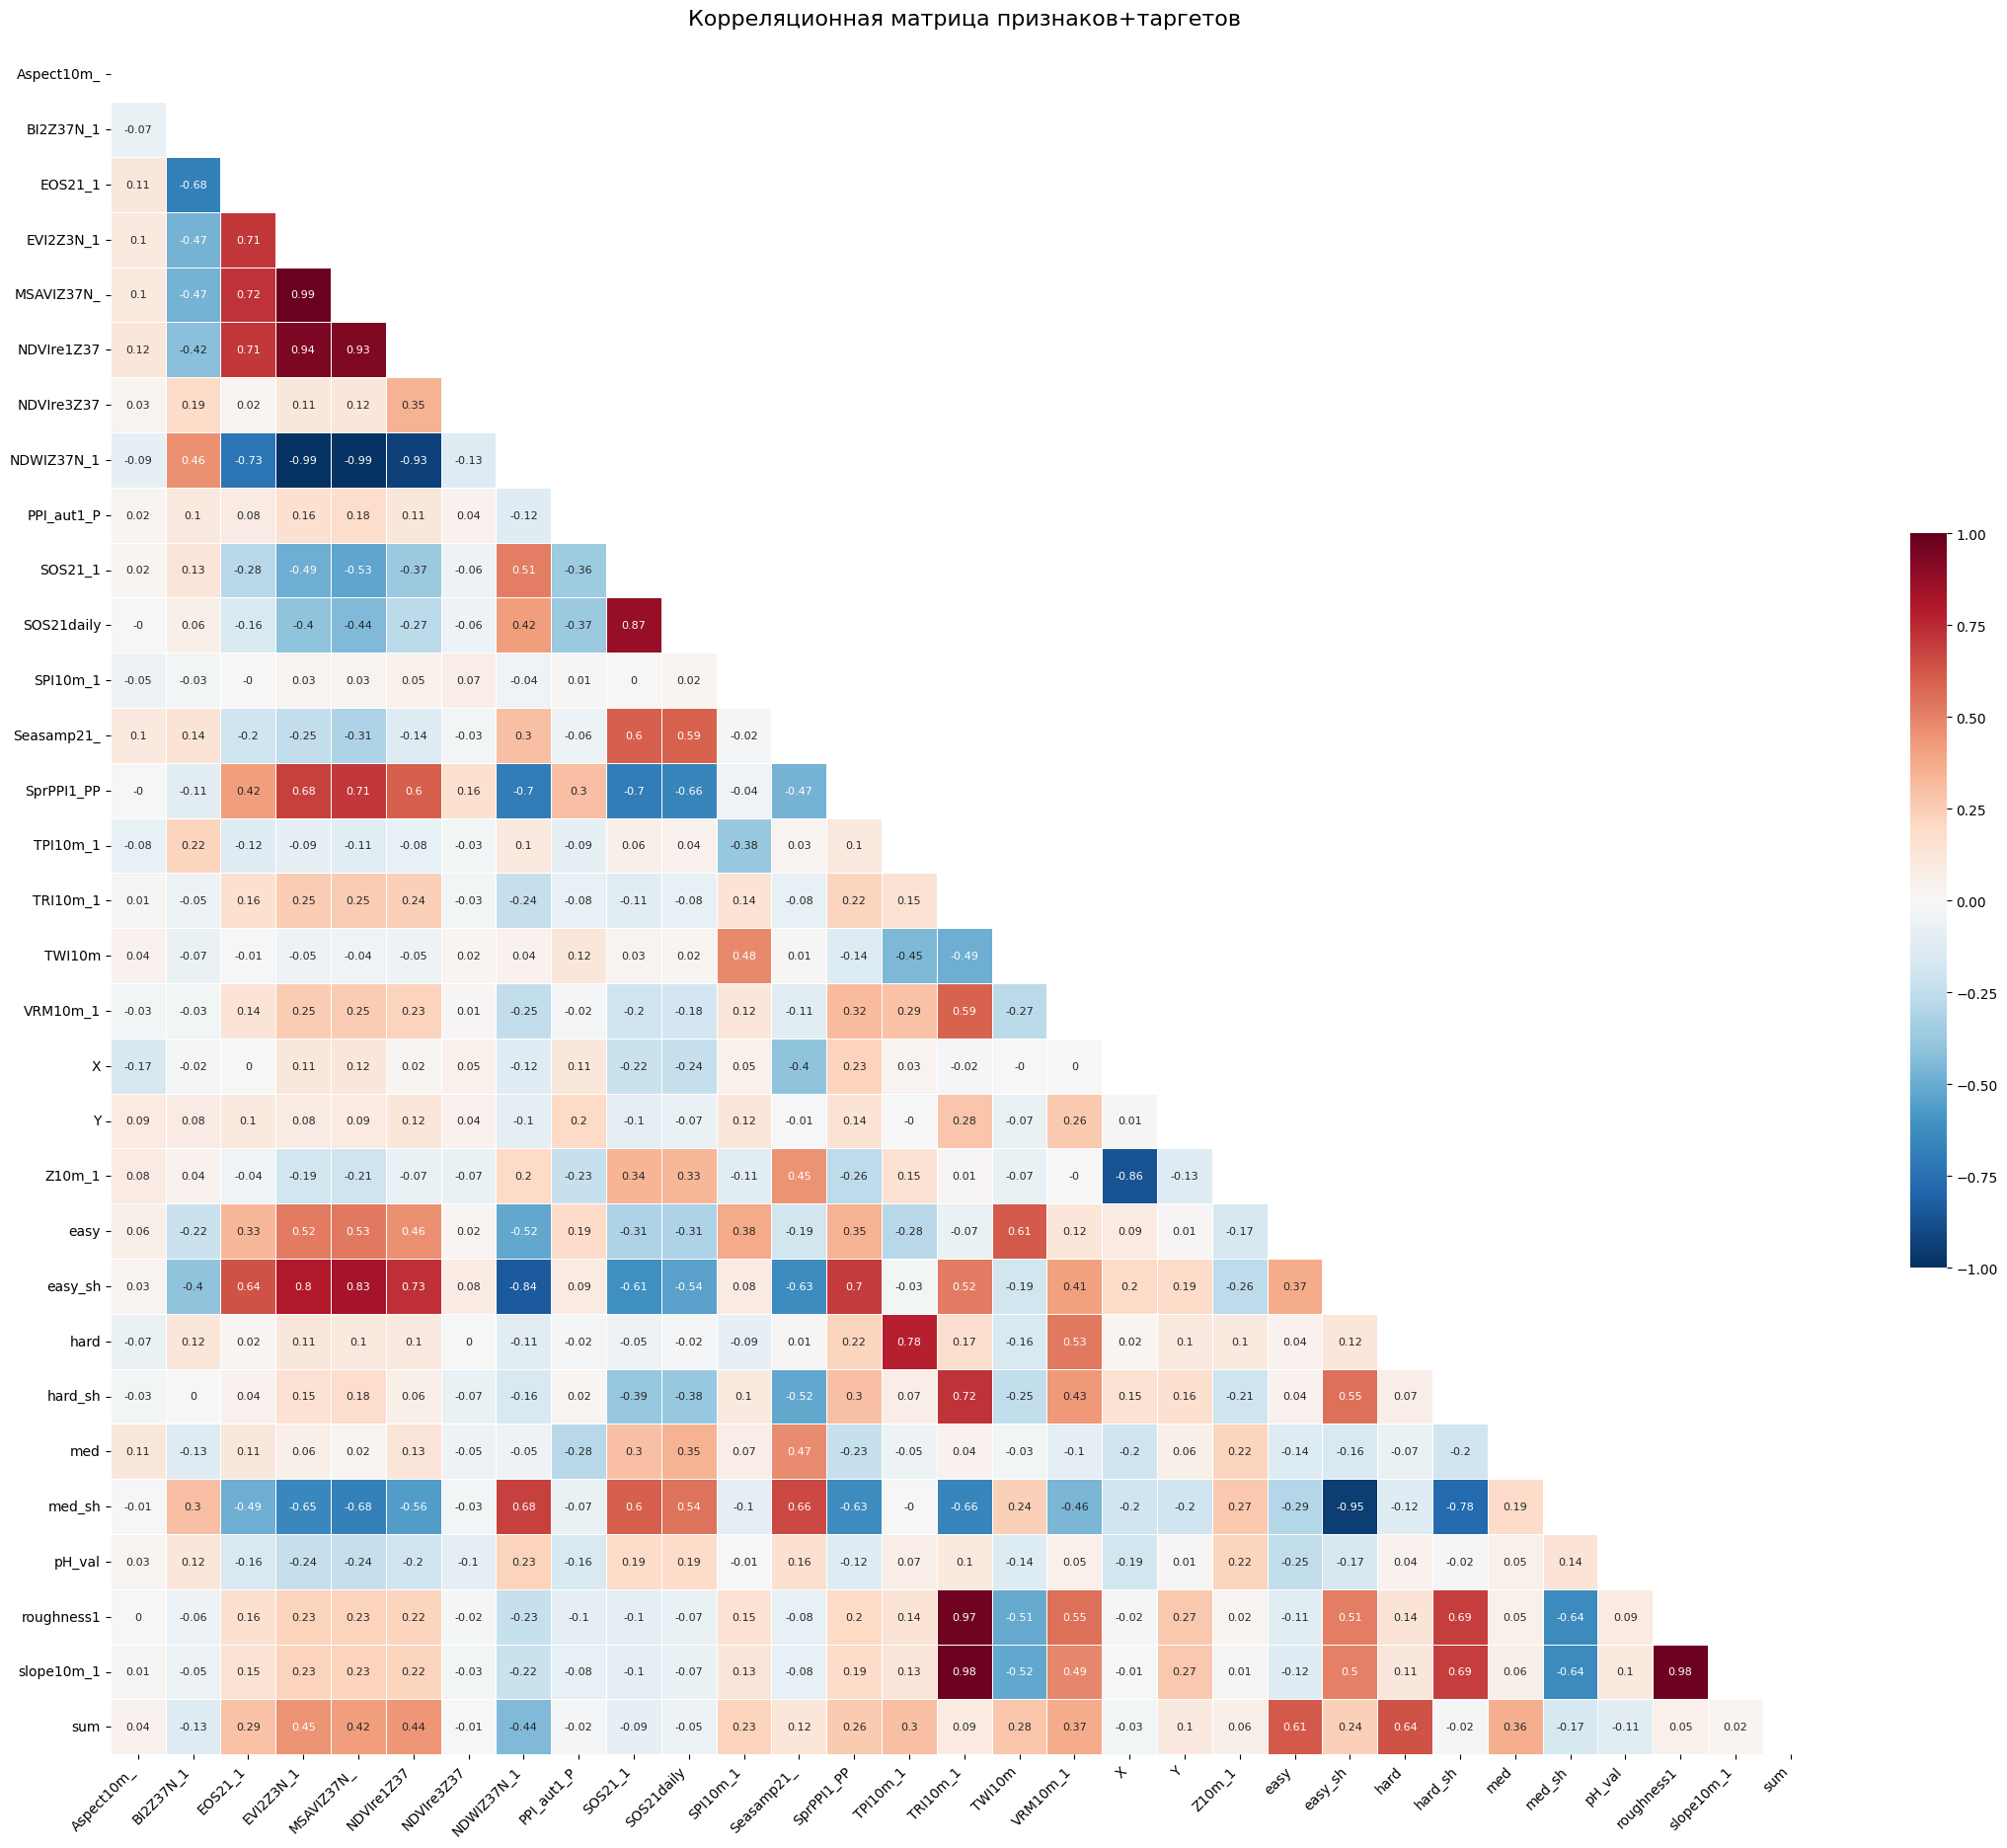

In [ ]:
correlation_matrix = df_nophen.corr(method="pearson", numeric_only=True).round(2)

sorted_columns = sorted(correlation_matrix.columns)
correlation_matrix_sorted = correlation_matrix.reindex(columns=sorted_columns, index=sorted_columns)

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(correlation_matrix_sorted, dtype=bool))

plt.figure(figsize=(24, 24))

heatmap = sns.heatmap(
    correlation_matrix_sorted,
    mask=mask,
    annot=True,
    annot_kws={"size": 8},
    square=True,
    cmap="RdBu_r",
    vmax=1,
    vmin=-1,
    cbar_kws={"fraction": 0.02, "shrink": 0.75},
    linewidth=0.5,
)

heatmap.set_xticklabels(
    heatmap.get_xticklabels(), rotation=45, horizontalalignment="right", fontsize=10
)
heatmap.set_yticklabels(
    heatmap.get_yticklabels(), fontsize=10
)
heatmap.set_title("Корреляционная матрица признаков+таргетов", fontdict={"fontsize": 16}, pad=16)
plt.show()

## phik for targets

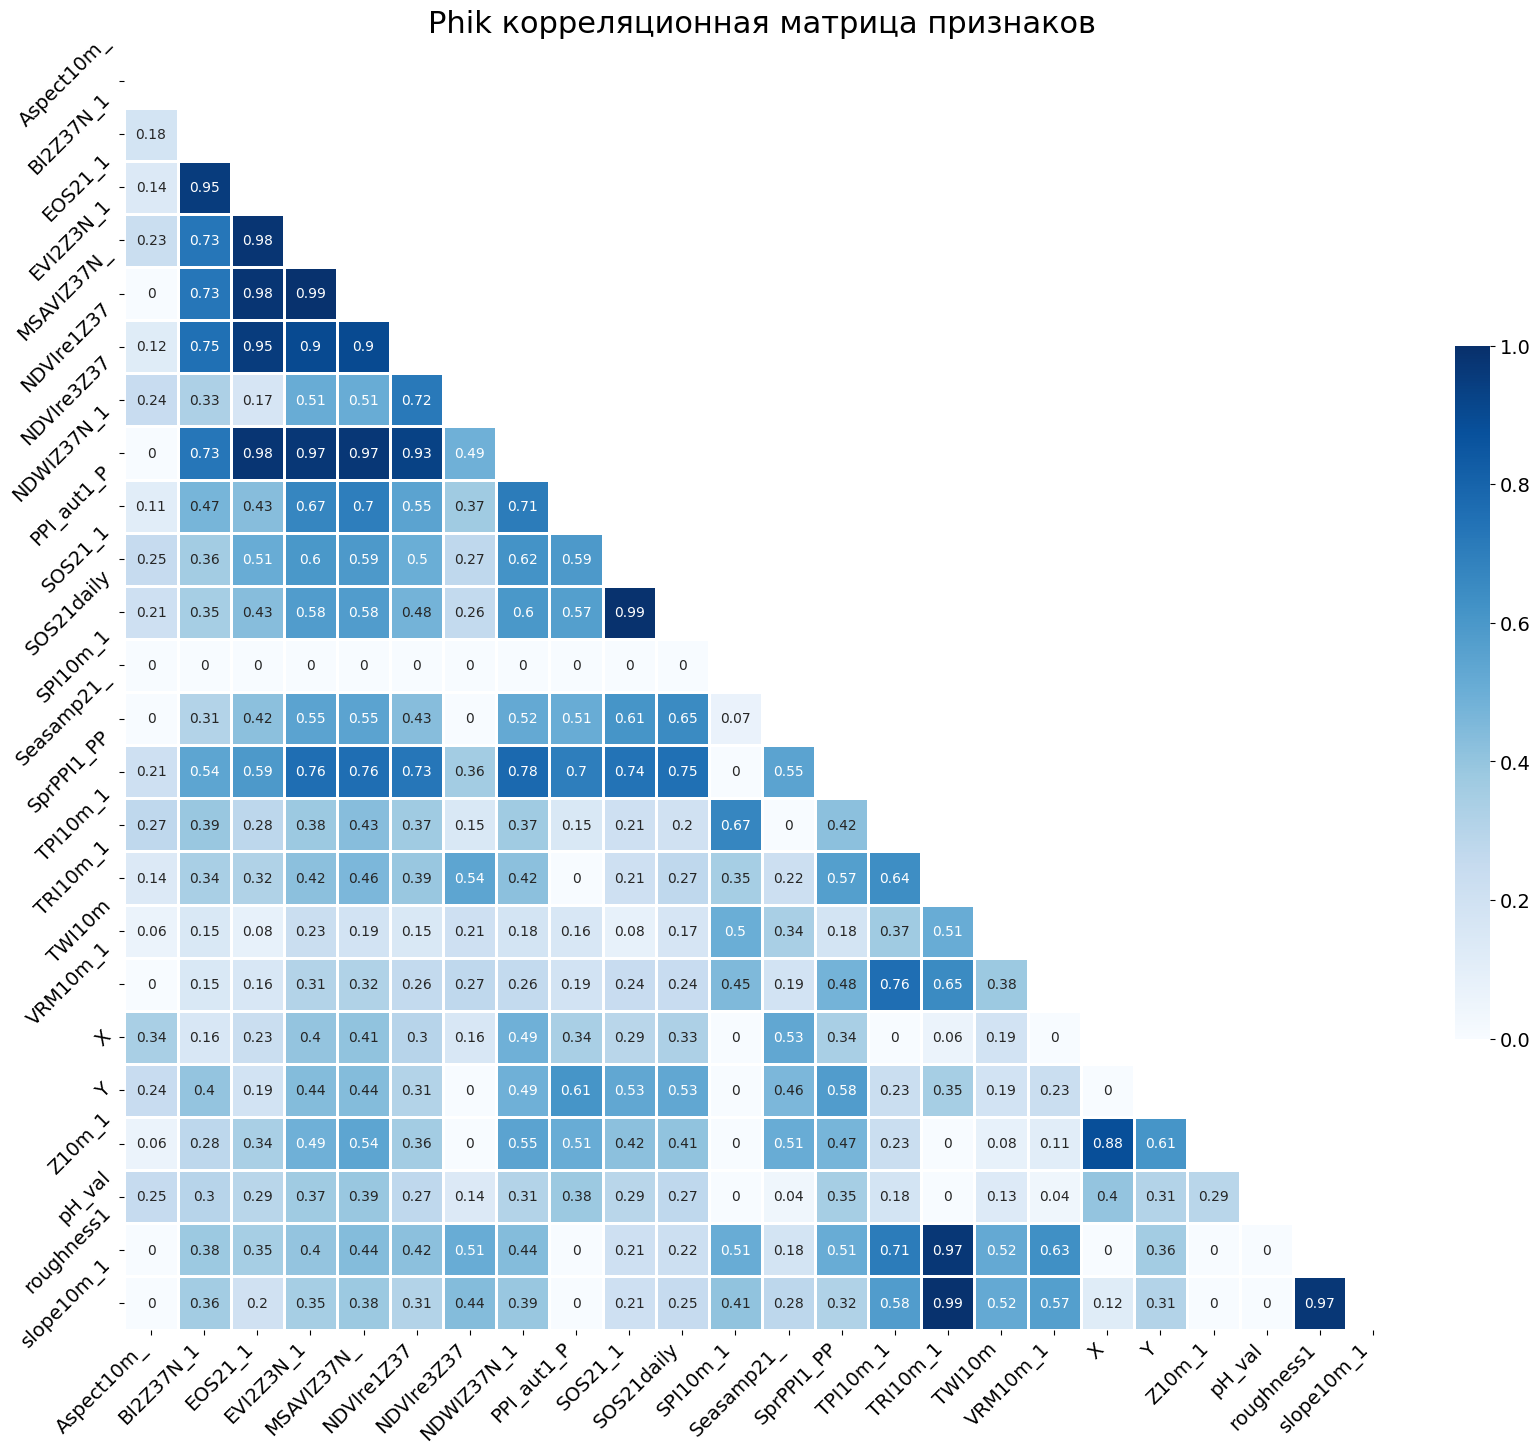

In [ ]:
# Calculate the Phi-k correlation matrix
# df_nophen_x = df_nophen_x.drop(['SOSEOS'], axis=1)
phik_corr_matrix = df_nophen_x.phik_matrix(interval_cols=df_nophen.columns)

# Round the values to 2 decimal places
phik_corr_matrix_rounded = phik_corr_matrix.round(2)

# Sort the columns in alphabetical order
sorted_columns = sorted(phik_corr_matrix_rounded.columns)

# Reindex the matrix based on sorted columns
phik_corr_matrix_sorted = phik_corr_matrix_rounded.reindex(columns=sorted_columns, index=sorted_columns)

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(phik_corr_matrix_sorted, dtype=bool))

# Plotting the heatmap
plt.figure(figsize=(18, 18))
heatmap = sns.heatmap(
    phik_corr_matrix_sorted,
    mask=mask,
    annot=True,
    square=True,
    cmap='Blues',
    vmax=1,
    vmin=0,
    cbar_kws={'shrink': 0.5, 'aspect': 20, 'fraction': 0.046, 'pad': 0.04},  # increase color bar size
    linewidth=2,
    annot_kws={"size": 10},  # increase annotation font size
)

# Increase colorbar label fontsize
cbar = heatmap.collections[0].colorbar
cbar.ax.tick_params(labelsize=14)

# Adjust the x-tick and y-tick labels fontsize
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=14)
heatmap.set_yticklabels(heatmap.get_yticklabels(), rotation=45, horizontalalignment='right', fontsize=14)

# Set the title with increased fontsize
heatmap.set_title('Phik корреляционная матрица признаков', fontdict={'fontsize': 22}, pad=16)

# Display the plot
plt.show()